In [1]:
from torchvision import transforms, datasets, models
import torch
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import umap

BATCH_SIZE = 30

data_transforms = transforms.Compose([transforms.Resize((221,221)), 
                          transforms.ToTensor(),
                          transforms.Normalize(mean=[0.485], std=[0.229])])
PATH = "data\\meta\\"

In [2]:
dataset = datasets.ImageFolder(PATH, transform=data_transforms)
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [3]:
vgg16 = models.vgg16(pretrained=True)
vgg16.classifier = vgg16.classifier[0:4] # remove head
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
batch_imgs, _ = next(iter(data_loader))
embs = vgg16(batch_imgs)

In [5]:
red = umap.UMAP(n_neighbors=7, n_components=3)
red_embs = red.fit_transform(embs.detach().numpy())

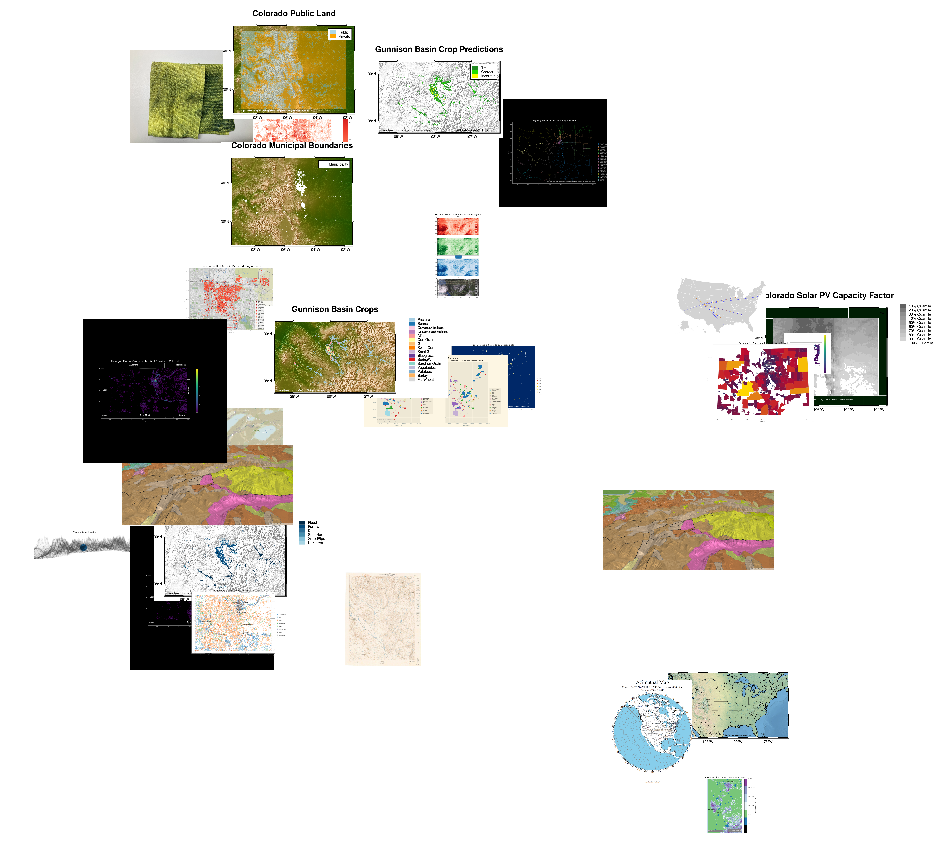

In [6]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.1)

paths = []
for i in range(28):
    paths.append(dataset.imgs[i][0])

x = red_embs[:,0]
y = red_embs[:,1]
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x, y) 
ax.set_axis_off()
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
plt.savefig('Day_30.png')